<a id=top-page></a>
# The effect of changing the cost function's hyper-parameters, $r$ and $b$

In this notebook, we explore the effect of changing the cost function's hyper-parameters, $r$ and $b$, on toy functions.

The analysis in this notebook is performed in the following steps:

- [How does the cost function, $\mathcal{L}$, with varying hyper-parameters respond to feature size?](#feature-size)
- [How does the cost function, $\mathcal{L}$, with varying hyper-parameters respond to multiple feature sizes?](#multiple-feature-sizes)
- [How does the cost function, $\mathcal{L}$, with varying hyper-parameters respond to non-uniqueness?](#non-uniqueness)

***

In [1]:
%run -i imports.py
%matplotlib inline

In [2]:
penalty = 'log-sigma-over-peak'
norm = 'max'
colormap = 'plasma'
save_figures = True

In [3]:
powers_list = [0.5,1,1.5,2,2.5,3]

In [4]:
vertical_shifts_list = [0.5,1,1.5,2,2.5,3]

In [5]:
color_map_colors = cm.get_cmap('Greys')
variable_colors = np.flipud(color_map_colors(np.linspace(0.2, 1, len(powers_list))))

<a id=feature-size></a>
***

## How does the cost function, $\mathcal{L}$, with varying hyper-parameters respond to feature size?

[Go to the top](#top-page)

	Time it took: 0.4 minutes.
----------------------------------------
	Time it took: 0.4 minutes.
----------------------------------------
	Time it took: 0.7 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
------

imports.py:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
imports.py:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.6 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.6 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.6 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
------

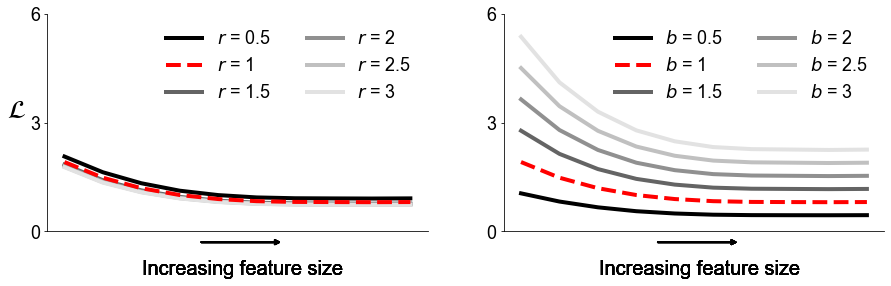

In [33]:
x, y = np.meshgrid(np.linspace(-1,1,80), np.linspace(-1,1,80))
x = x.ravel()[:,None]
y = y.ravel()[:,None]
stds = [round(i, 2) for i in np.linspace(0.05,0.6,10)]
x_axis = [i for i in range(0,len(stds))]
bandwidth_values = np.logspace(-2.5, 0.5, 200)

fig = plt.figure(figsize=(15, 4))
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=[1,1], height_ratios=[1])

iter_number = 0

tic_total = time.perf_counter()

for power, vertical_shift in zip(powers_list, vertical_shifts_list):

    costs_increasing_r = []
    costs_increasing_b = []
    
    for i, std in enumerate(stds):

        tic = time.perf_counter()

        z = np.exp(-((x*x+y*y) / (2.0 * std**2)))
        z = z.ravel()[:,None]
        z = z/np.max(z)

        variance_data = analysis.compute_normalized_variance(np.hstack((x,y)),
                                                             z,
                                                             depvar_names=['var'],
                                                             bandwidth_values=bandwidth_values)

        cost = analysis.cost_function_normalized_variance_derivative(variance_data,
                                                                     penalty_function=penalty,
                                                                     power=power,
                                                                     vertical_shift=1,
                                                                     norm=norm,
                                                                     integrate_to_peak=False)
        costs_increasing_r.append(cost)

        cost = analysis.cost_function_normalized_variance_derivative(variance_data,
                                                                     penalty_function=penalty,
                                                                     power=1,
                                                                     vertical_shift=vertical_shift,
                                                                     norm=norm,
                                                                     integrate_to_peak=False)
        costs_increasing_b.append(cost)

        toc = time.perf_counter()
        print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)
    
    ax1 = fig.add_subplot(spec[0,0])
    if power==1:
        ax1.plot(x_axis, costs_increasing_r, '--', c='r', lw=4, label='$r$ = ' + str(power), zorder=100)
    else:
        ax1.plot(x_axis, costs_increasing_r, '-', c=variable_colors[iter_number], lw=4, label='$r$ = ' + str(power), zorder=10)
    ax1.set_xticks([])
    ax1.set_xticklabels([], fontsize=18)
    plt.ylim([0,6])
    ax1.set_yticks([0,3,6])
    ax1.set_yticklabels([0,3,6], fontsize=18)
    ax1.set_ylabel('$\mathcal{L}$', fontsize=26, rotation=0, horizontalalignment='right')
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    plt.legend(frameon=False, fontsize=18, ncol=2)
    plt.text(0.25,-0.2, 'Increasing feature size', fontsize=20, transform=ax1.transAxes)
    plt.annotate('', xy=(0.4, -0.05), xycoords='axes fraction', xytext=(0.62, -0.05),
                arrowprops=dict(arrowstyle="<-", color='k', lw=2))

    ax2 = fig.add_subplot(spec[0,1])
    if vertical_shift==1:
        ax2.plot(x_axis, costs_increasing_b, '--', c='r', lw=4, label='$b$ = ' + str(vertical_shift), zorder=100)
    else:
        ax2.plot(x_axis, costs_increasing_b, '-', c=variable_colors[iter_number], lw=4, label='$b$ = ' + str(vertical_shift), zorder=10)
    ax2.set_xticks([])
    ax2.set_xticklabels([], fontsize=18)
    plt.ylim([0,6])
    ax2.set_yticks([0,3,6])
    ax2.set_yticklabels([0,3,6], fontsize=18)
    ax2.spines["top"].set_visible(False)
    ax2.spines["right"].set_visible(False)
    plt.legend(frameon=False, fontsize=18, ncol=2)
    plt.text(0.25,-0.2, 'Increasing feature size', fontsize=20, transform=ax2.transAxes)
    plt.annotate('', xy=(0.4, -0.05), xycoords='axes fraction', xytext=(0.62, -0.05),
                arrowprops=dict(arrowstyle="<-", color='k', lw=2))

    iter_number += 1
    
toc_total = time.perf_counter()
print(f'\tTotal time it took: {(toc_total - tic_total)/60:0.1f} minutes.\n' + '-'*40)
if save_figures: plt.savefig('../figures/effect-of-hyperparameters-on-cost-function-feature-size.svg', dpi=400, bbox_inches='tight')

<a id=multiple-feature-sizes></a>
***
## How does the cost function, $\mathcal{L}$, with varying hyper-parameters respond to multiple feature sizes?

[Go to the top](#top-page)

	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------


imports.py:64: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
imports.py:82: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
------

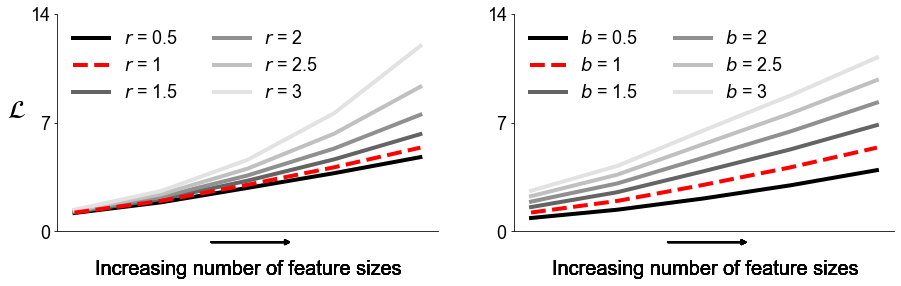

In [7]:
x = np.linspace(-4, 2.5, 2000)
features = [1, 2, 3, 4, 5]
x_axis = [i for i in range(0,len(features))]
fig = plt.figure(figsize=(15, 4))
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=[1,1], height_ratios=[1])
bandwidth_values = np.logspace(-3, 0.5, 200)

iter_number = 0

tic_total = time.perf_counter()

for power, vertical_shift in zip(powers_list, vertical_shifts_list):

    costs_increasing_r = []
    costs_increasing_b = []
    
    for i in range(0,len(features)):

        tic = time.perf_counter()

        if i == 0:
            z = np.sin(2*x)
        if i == 1:
            z = np.sin(2*x) + np.sin(4*x)
        if i == 2:
            z = np.sin(2*x) + np.sin(4*x) + np.sin(8*x)
        if i == 3:
            z = np.sin(2*x) + np.sin(4*x) + np.sin(8*x) + np.sin(16*x)
        if i == 4:
            z = np.sin(2*x) + np.sin(4*x) + np.sin(8*x) + np.sin(16*x) + np.sin(32*x)

        z = z/np.max(z)

        variance_data = analysis.compute_normalized_variance(x[:,None], 
                                                             z.ravel()[:,None], 
                                                             depvar_names=['var'], 
                                                             bandwidth_values=bandwidth_values)

        cost = analysis.cost_function_normalized_variance_derivative(variance_data,
                                                                     penalty_function=penalty,
                                                                     power=power,
                                                                     vertical_shift=1,
                                                                     norm=norm,
                                                                     integrate_to_peak=False, 
                                                                     rightmost_peak_shift=70)


        costs_increasing_r.append(cost)
        
        cost = analysis.cost_function_normalized_variance_derivative(variance_data,
                                                                     penalty_function=penalty,
                                                                     power=1,
                                                                     vertical_shift=vertical_shift,
                                                                     norm=norm,
                                                                     integrate_to_peak=False, 
                                                                     rightmost_peak_shift=70)


        costs_increasing_b.append(cost)
        
        toc = time.perf_counter()
        print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

    ax1 = fig.add_subplot(spec[0,0])
    if power==1:
        ax1.plot(x_axis, costs_increasing_r, '--', c='r', lw=4, label='$r$ = ' + str(power), zorder=100)
    else:
        ax1.plot(x_axis, costs_increasing_r, '-', c=variable_colors[iter_number], lw=4, label='$r$ = ' + str(power), zorder=10)
    ax1.set_xticks([])
    ax1.set_xticklabels([], fontsize=18)
    plt.ylim([0,14])
    ax1.set_yticks([0,7,14])
    ax1.set_yticklabels([0,7,14], fontsize=18)
    ax1.set_ylabel('$\mathcal{L}$', fontsize=26, rotation=0, horizontalalignment='right')
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    plt.legend(frameon=False, fontsize=18, ncol=2, loc='upper left')
    plt.text(0.1,-0.2, 'Increasing number of feature sizes', fontsize=20, transform=ax1.transAxes)
    plt.annotate('', xy=(0.4, -0.05), xycoords='axes fraction', xytext=(0.62, -0.05),
                arrowprops=dict(arrowstyle="<-", color='k', lw=2))

    ax2 = fig.add_subplot(spec[0,1])
    if vertical_shift==1:
        ax2.plot(x_axis, costs_increasing_b, '--', c='r', lw=4, label='$b$ = ' + str(vertical_shift), zorder=100)
    else:
        ax2.plot(x_axis, costs_increasing_b, '-', c=variable_colors[iter_number], lw=4, label='$b$ = ' + str(vertical_shift), zorder=10)
    ax2.set_xticks([])
    ax2.set_xticklabels([], fontsize=18)
    plt.ylim([0,14])
    ax2.set_yticks([0,7,14])
    ax2.set_yticklabels([0,7,14], fontsize=18)
    ax2.spines["top"].set_visible(False)
    ax2.spines["right"].set_visible(False)
    plt.legend(frameon=False, fontsize=18, ncol=2, loc='upper left')
    plt.text(0.1,-0.2, 'Increasing number of feature sizes', fontsize=20, transform=ax2.transAxes)
    plt.annotate('', xy=(0.4, -0.05), xycoords='axes fraction', xytext=(0.62, -0.05),
                arrowprops=dict(arrowstyle="<-", color='k', lw=2))

    iter_number += 1
    
toc_total = time.perf_counter()
print(f'\tTotal time it took: {(toc_total - tic_total)/60:0.1f} minutes.\n' + '-'*40)

if save_figures: plt.savefig('../figures/effect-of-hyperparameters-on-cost-function-multiple-feature-sizes.svg', dpi=400, bbox_inches='tight')

<a id=non-uniqueness></a>
***

## How does the cost function, $\mathcal{L}$, respond to non-uniqueness?

[Go to the top](#top-page)

	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
------

imports.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
imports.py:78: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
------

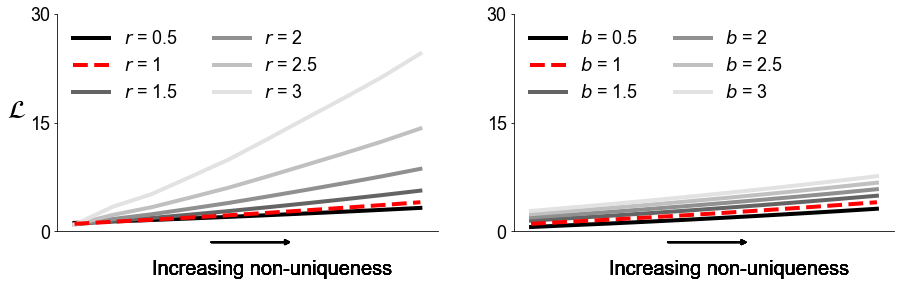

In [37]:
n_points = 1000
x_base = np.linspace(0,100,n_points)
overlap_depths = np.array([0,1,2,3,4,5,6,7,8,9])*10
x_axis = [i for i in range(0,len(overlap_depths))]
bandwidth_values = np.logspace(-6, 2, 200)

fig = plt.figure(figsize=(15, 4))
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=[1,1], height_ratios=[1])

iter_number = 0

tic_total = time.perf_counter()

for power, vertical_shift in zip(powers_list, vertical_shifts_list):

    costs_increasing_r = []
    costs_increasing_b = []

    for j, n_points_overlap_x in enumerate(overlap_depths):

        tic = time.perf_counter()

        x_overlap = np.linspace(100-n_points_overlap_x/5,100.1,n_points_overlap_x)
        x = np.vstack((x_base[:,None], x_overlap[:,None]))
        z = np.zeros((n_points+n_points_overlap_x,1))
        for observation, x_value in enumerate(x):
            if observation < n_points:
                z[observation] = x_value
            else:
                z[observation] = 0

        z = z/np.max(z)

        variance_data = analysis.compute_normalized_variance(x, 
                                                             z, 
                                                             depvar_names=['var'], 
                                                             bandwidth_values=bandwidth_values)

        cost = analysis.cost_function_normalized_variance_derivative(variance_data,
                                                                     penalty_function=penalty,
                                                                     power=power,
                                                                     vertical_shift=1,
                                                                     norm=norm,
                                                                     integrate_to_peak=False)

        costs_increasing_r.append(cost)

        cost = analysis.cost_function_normalized_variance_derivative(variance_data,
                                                                     penalty_function=penalty,
                                                                     power=1,
                                                                     vertical_shift=vertical_shift,
                                                                     norm=norm,
                                                                     integrate_to_peak=False)

        costs_increasing_b.append(cost)

        toc = time.perf_counter()
        print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

    ax1 = fig.add_subplot(spec[0,0])
    if power==1:
        ax1.plot(x_axis, costs_increasing_r, '--', c='r', lw=4, label='$r$ = ' + str(power), zorder=100)
    else:
        ax1.plot(x_axis, costs_increasing_r, '-', c=variable_colors[iter_number], lw=4, label='$r$ = ' + str(power), zorder=10)
    ax1.set_xticks([])
    ax1.set_xticklabels([], fontsize=18)
    plt.ylim([0,30])
    ax1.set_yticks([0,15,30])
    ax1.set_yticklabels([0,15,30], fontsize=18)
    ax1.set_ylabel('$\mathcal{L}$', fontsize=26, rotation=0, horizontalalignment='right')
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    plt.legend(frameon=False, fontsize=18, ncol=2, loc='upper left')
    plt.text(0.25,-0.2, 'Increasing non-uniqueness', fontsize=20, transform=ax1.transAxes)
    plt.annotate('', xy=(0.4, -0.05), xycoords='axes fraction', xytext=(0.62, -0.05),
                arrowprops=dict(arrowstyle="<-", color='k', lw=2))

    ax2 = fig.add_subplot(spec[0,1])
    if vertical_shift==1:
        ax2.plot(x_axis, costs_increasing_b, '--', c='r', lw=4, label='$b$ = ' + str(vertical_shift), zorder=100)
    else:
        ax2.plot(x_axis, costs_increasing_b, '-', c=variable_colors[iter_number], lw=4, label='$b$ = ' + str(vertical_shift), zorder=10)
    ax2.set_xticks([])
    ax2.set_xticklabels([], fontsize=18)
    plt.ylim([0,30])
    ax2.set_yticks([0,15,30])
    ax2.set_yticklabels([0,15,30], fontsize=18)
    ax2.spines["top"].set_visible(False)
    ax2.spines["right"].set_visible(False)
    plt.legend(frameon=False, fontsize=18, ncol=2, loc='upper left')
    plt.text(0.25,-0.2, 'Increasing non-uniqueness', fontsize=20, transform=ax2.transAxes)
    plt.annotate('', xy=(0.4, -0.05), xycoords='axes fraction', xytext=(0.62, -0.05),
                arrowprops=dict(arrowstyle="<-", color='k', lw=2))

    iter_number += 1
    
toc_total = time.perf_counter()
print(f'\tTotal time it took: {(toc_total - tic_total)/60:0.1f} minutes.\n' + '-'*40)

if save_figures: plt.savefig('../figures/effect-of-hyperparameters-on-cost-function-non-uniqueness.svg', dpi=400, bbox_inches='tight')

***